# Kaggle Preparation

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"leonardrizta","key":"9e49c9b604d0e7ce6ee28ad39bffc2b1"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-21 06:23:33           5983  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3342  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1180  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1921  
promptcloud/care

In [ ]:
!kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [00:36<00:00, 67.1MB/s]
100% 1.72G/1.72G [00:36<00:00, 50.0MB/s]


In [ ]:
dataset_path = "/content/dermnet.zip"
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# Dataset Preparation

In [ ]:
train_data_dir = '/tmp/train/'
validation_data_dir = '/tmp/test/'

In [ ]:
train_data_list = os.listdir(train_data_dir)
validation_data_list = os.listdir(validation_data_dir)
print(os.listdir(train_data_dir))
print(os.listdir(validation_data_dir))
print(len(os.listdir(train_data_dir)))
print(len(os.listdir(validation_data_dir)))

['Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Scabies Lyme Disease and other Infestations and Bites', 'Herpes HPV and other STDs Photos', 'Acne and Rosacea Photos', 'Warts Molluscum and other Viral Infections', 'Systemic Disease', 'Vascular Tumors', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Melanoma Skin Cancer Nevi and Moles', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Exanthems and Drug Eruptions', 'Poison Ivy Photos and other Contact Dermatitis', 'Vasculitis Photos', 'Urticaria Hives', 'Seborrheic Keratoses and other Benign Tumors', 'Cellulitis Impetigo and other Bacterial Infections', 'Nail Fungus and other Nail Disease', 'Psoriasis pictures Lichen Planus and related diseases']
['Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Tinea Ringworm Can

In [ ]:
train_folder_dict = dict(zip(train_data_list, [len(os.listdir(train_data_dir + folder)) for folder in train_data_list]))

In [ ]:
sorted_tuples = sorted(train_folder_dict.items(), key=lambda item: item[1], reverse=True)
sorted_dict = {k: v for k, v in sorted_tuples}
print(sorted_dict)

{'Psoriasis pictures Lichen Planus and related diseases': 1405, 'Seborrheic Keratoses and other Benign Tumors': 1371, 'Tinea Ringworm Candidiasis and other Fungal Infections': 1300, 'Eczema Photos': 1235, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1149, 'Warts Molluscum and other Viral Infections': 1086, 'Nail Fungus and other Nail Disease': 1040, 'Acne and Rosacea Photos': 840, 'Systemic Disease': 606, 'Light Diseases and Disorders of Pigmentation': 568, 'Atopic Dermatitis Photos': 489, 'Vascular Tumors': 482, 'Melanoma Skin Cancer Nevi and Moles': 463, 'Bullous Disease Photos': 448, 'Scabies Lyme Disease and other Infestations and Bites': 431, 'Lupus and other Connective Tissue diseases': 420, 'Vasculitis Photos': 416, 'Herpes HPV and other STDs Photos': 405, 'Exanthems and Drug Eruptions': 404, 'Cellulitis Impetigo and other Bacterial Infections': 288, 'Poison Ivy Photos and other Contact Dermatitis': 260, 'Hair Loss Photos Alopecia and other Hair Diseases

In [ ]:
seven_highest_data = {k: v for k, v in sorted_tuples[:7]}
print(seven_highest_data)
unused_data = {k: v for k, v in sorted_tuples[7:]}
print(unused_data)

{'Psoriasis pictures Lichen Planus and related diseases': 1405, 'Seborrheic Keratoses and other Benign Tumors': 1371, 'Tinea Ringworm Candidiasis and other Fungal Infections': 1300, 'Eczema Photos': 1235, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1149, 'Warts Molluscum and other Viral Infections': 1086, 'Nail Fungus and other Nail Disease': 1040}
{'Acne and Rosacea Photos': 840, 'Systemic Disease': 606, 'Light Diseases and Disorders of Pigmentation': 568, 'Atopic Dermatitis Photos': 489, 'Vascular Tumors': 482, 'Melanoma Skin Cancer Nevi and Moles': 463, 'Bullous Disease Photos': 448, 'Scabies Lyme Disease and other Infestations and Bites': 431, 'Lupus and other Connective Tissue diseases': 420, 'Vasculitis Photos': 416, 'Herpes HPV and other STDs Photos': 405, 'Exanthems and Drug Eruptions': 404, 'Cellulitis Impetigo and other Bacterial Infections': 288, 'Poison Ivy Photos and other Contact Dermatitis': 260, 'Hair Loss Photos Alopecia and other Hair Disease

In [ ]:
for data in unused_data:
  try:
    shutil.rmtree(train_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
  try:
    shutil.rmtree(validation_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
print("Done!")

Done!


# CNN

In [ ]:
TRAINING_DIR = '/tmp/dataset/train/'
training_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 40,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = '/tmp/dataset/test'
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (250, 250),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (250, 250),
    class_mode = 'categorical',
    batch_size = 126
)

Found 12153 images belonging to 7 classes.
Found 2128 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(train_generator, epochs = 35, steps_per_epoch = 25, validation_data = validation_generator, verbose = 1, validation_steps = 7)

Epoch 1/35
25/25 [==============================] - 88s 2s/step - loss: 2.2962 - accuracy: 0.1644 - val_loss: 1.9387 - val_accuracy: 0.1429
Epoch 2/35
25/25 [==============================] - 54s 2s/step - loss: 1.9351 - accuracy: 0.2006 - val_loss: 1.9332 - val_accuracy: 0.1100
Epoch 3/35
25/25 [==============================] - 54s 2s/step - loss: 1.9082 - accuracy: 0.2041 - val_loss: 1.9223 - val_accuracy: 0.1179
Epoch 4/35
25/25 [==============================] - 54s 2s/step - loss: 1.9029 - accuracy: 0.2117 - val_loss: 1.9405 - val_accuracy: 0.1349
Epoch 5/35
25/25 [==============================] - 54s 2s/step - loss: 1.8828 - accuracy: 0.2213 - val_loss: 1.9377 - val_accuracy: 0.1213
Epoch 6/35
25/25 [==============================] - 54s 2s/step - loss: 1.8936 - accuracy: 0.2340 - val_loss: 1.9795 - val_accuracy: 0.0862
Epoch 7/35
25/25 [==============================] - 53s 2s/step - loss: 1.8728 - accuracy: 0.2362 - val_loss: 1.9354 - val_accuracy: 0.1247
Epoch 8/35
25/25 [==

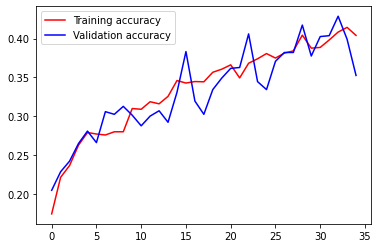

<Figure size 432x288 with 0 Axes>

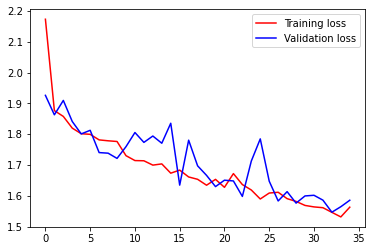

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# ResNet50

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import  preprocess_input

In [ ]:
img_width, img_height = 256, 256

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input

HEIGHT = 300
WIDTH = 300

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "/kaggle/input/dermnet/train/"
HEIGHT = 300
WIDTH = 300
BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)


test_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=BATCH_SIZE)

Found 8586 images belonging to 7 classes.
Found 2150 images belonging to 7 classes.


In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, Model
from tensorflow.keras import models

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    new_model = models.Sequential()
    new_model.add(base_model)
    new_model.add(Flatten())
    x = new_model.output
    for fc in fc_layers:
        new_model.add(Dense(fc, activation='relu'))
        new_model.add(Dropout(dropout))

    new_model.add(Dense(num_classes, activation='softmax'))
    print(new_model.summary())

    return new_model

class_list = os.listdir(train_data_dir)
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 204800)            0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 1024)              209716224 
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 1024)              1049600   
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 7)                

In [ ]:
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

NUM_EPOCHS = 30
BATCH_SIZE = 16
num_train_images = 8586

adam = Adam(learning_rate=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = finetune_model.fit(train_generator, epochs=NUM_EPOCHS, workers=16, 
                                       steps_per_epoch=num_train_images // BATCH_SIZE, 
                                       shuffle=True,
                                       validation_data = validation_generator)

Epoch 1/30
536/536 [==============================] - 178s 322ms/step - loss: 2.4816 - accuracy: 0.2735 - val_loss: 1.5249 - val_accuracy: 0.4177
Epoch 2/30
536/536 [==============================] - 175s 323ms/step - loss: 1.7634 - accuracy: 0.3298 - val_loss: 1.5182 - val_accuracy: 0.4279
Epoch 3/30
536/536 [==============================] - 170s 313ms/step - loss: 1.6537 - accuracy: 0.3666 - val_loss: 1.4786 - val_accuracy: 0.4414
Epoch 4/30
536/536 [==============================] - 168s 311ms/step - loss: 1.6227 - accuracy: 0.3814 - val_loss: 1.4279 - val_accuracy: 0.4721
Epoch 5/30
536/536 [==============================] - 171s 313ms/step - loss: 1.6120 - accuracy: 0.3884 - val_loss: 1.4266 - val_accuracy: 0.4591
Epoch 6/30
536/536 [==============================] - 169s 312ms/step - loss: 1.5550 - accuracy: 0.4178 - val_loss: 1.3830 - val_accuracy: 0.4814
Epoch 7/30
536/536 [==============================] - 170s 310ms/step - loss: 1.5422 - accuracy: 0.4193 - val_loss: 1.3746 -

In [ ]:
while True:pass

KeyboardInterrupt: ignored

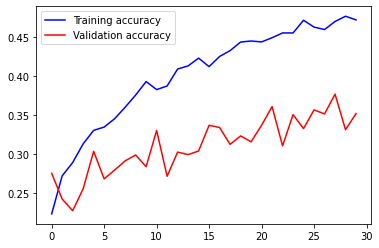

<Figure size 432x288 with 0 Axes>

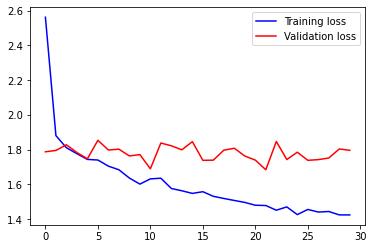

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()